In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs
# basemap toolkit to plot maps
from mpl_toolkits.basemap import Basemap

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

/home/561/erd561/wombat_jra-iaf_mom025


In [4]:
figures_path = '/home/561/erd561/figures/JRA_IAF_v13/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

jra55_path = '/g/data/ua8/JRA55-do/v1-3/'

accessom2_path = '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf/'

Figures will be saved in: /home/561/erd561/figures/JRA_IAF_v13/c07_eta_trends



In [5]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:34530' processes=8 cores=8>
CPU times: user 1.32 s, sys: 275 ms, total: 1.6 s
Wall time: 16.3 s


In [6]:
years = np.arange(2218, 2258)
years_id = np.arange(2218, 2258, 2)
n_years = np.arange(1978, 2018)

print(years)
print(len(years))

output_n = ["%03d" % i for i in range(130,150)]
print(output_n)
print(len(output_n))

[2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231
 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245
 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257]
40
['130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149']
20


In [7]:
temp_dir = 'ocean/ocean.nc'
temp_path = []
for oid, o in enumerate(output_n):
    for t in np.arange(2):
        print(str(years_id[oid]+t) + ' OK')
        path_now = accessom2_path + 'output' + o + '/' + temp_dir

        if o == output_n[0] and t == 0:
            temp = xr.open_dataset(path_now).\
            temp.\
            sel(st_ocean=0, method='nearest').\
            sel(xt_ocean=slice(-260,-190)).\
            sel(yt_ocean=slice(-60,-20)).\
            sel(time= str(years_id[oid]+t) + '-06-30')-273.15
        else:
            temp = xr.concat([
                temp,
                xr.open_dataset(path_now).\
                temp.\
                sel(st_ocean=0, method='nearest').\
                sel(xt_ocean=slice(-260,-190)).\
                sel(yt_ocean=slice(-60,-20)).\
                sel(time= str(years_id[oid]+t) + '-06-30')-273.15
                ], 'time'
                )
xt_ocean = temp.xt_ocean
xt_ocean_corrected = xt_ocean + 360
temp = temp.assign_coords(xt_ocean=xt_ocean_corrected)
temp = temp.assign_coords(time=n_years)
print(temp)

2218 OK
2219 OK
2220 OK
2221 OK
2222 OK
2223 OK
2224 OK
2225 OK
2226 OK
2227 OK
2228 OK
2229 OK
2230 OK
2231 OK
2232 OK
2233 OK
2234 OK
2235 OK
2236 OK
2237 OK
2238 OK
2239 OK
2240 OK
2241 OK
2242 OK
2243 OK
2244 OK
2245 OK
2246 OK
2247 OK
2248 OK
2249 OK
2250 OK
2251 OK
2252 OK
2253 OK
2254 OK
2255 OK
2256 OK
2257 OK
<xarray.DataArray 'temp' (time: 40, yt_ocean: 220, xt_ocean: 280)>
array([[[-5.744324e-01, -5.956726e-01, ...,  2.290863e+00,  2.329651e+00],
        [-5.440063e-01, -5.519104e-01, ...,  2.409393e+00,  2.425140e+00],
        ...,
        [ 2.326456e+01,  2.326062e+01, ...,  2.501144e+01,  2.499146e+01],
        [ 2.340820e+01,  2.342810e+01, ...,  2.510577e+01,  2.508374e+01]],

       [[-2.543945e-01, -2.615356e-01, ...,  2.407043e+00,  2.440887e+00],
        [-1.929016e-01, -1.907959e-01, ...,  2.488770e+00,  2.519867e+00],
        ...,
        [ 2.317401e+01,  2.323444e+01, ...,  2.510349e+01,  2.509366e+01],
        [ 2.328632e+01,  2.333969e+01, ...,  2.520605e+01,  

In [8]:
%%time

eta_t_dir = 'ocean/ocean_month.nc'
eta_t_path = []
for oid, o in enumerate(output_n):
    for t in np.arange(2):
        print(str(years_id[oid]+t) + ' OK')
        path_now = accessom2_path + 'output' + o + '/' + eta_t_dir

        if o == output_n[0] and t == 0:
            eta_t = xr.open_dataset(path_now).\
            eta_t.\
            sel(xt_ocean=slice(-260,-190)).\
            sel(yt_ocean=slice(-60,-20)).\
            sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
            mean(dim='time')*100
            
        else:
            eta_t = xr.concat([
                eta_t,
                xr.open_dataset(path_now).\
                eta_t.\
                sel(xt_ocean=slice(-260,-190)).\
                sel(yt_ocean=slice(-60,-20)).\
                sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
                mean(dim='time')*100
                ], 'time'
                )
xt_ocean = eta_t.xt_ocean
xt_ocean_corrected = xt_ocean + 360
eta_t = eta_t.assign_coords(xt_ocean=xt_ocean_corrected)
eta_t = eta_t.assign_coords(time=n_years)
print(eta_t)

2218 OK
2219 OK
2220 OK
2221 OK
2222 OK
2223 OK
2224 OK
2225 OK
2226 OK
2227 OK
2228 OK
2229 OK
2230 OK
2231 OK
2232 OK
2233 OK
2234 OK
2235 OK
2236 OK
2237 OK
2238 OK
2239 OK
2240 OK
2241 OK
2242 OK
2243 OK
2244 OK
2245 OK
2246 OK
2247 OK
2248 OK
2249 OK
2250 OK
2251 OK
2252 OK
2253 OK
2254 OK
2255 OK
2256 OK
2257 OK
<xarray.DataArray 'eta_t' (time: 40, yt_ocean: 220, xt_ocean: 280)>
array([[[-191.926   , -191.87885 , ..., -150.14864 , -149.8075  ],
        [-191.07742 , -190.83357 , ..., -148.37088 , -148.37369 ],
        ...,
        [  37.778534,   37.45321 , ...,   59.03245 ,   59.253246],
        [  38.420387,   38.251568, ...,   59.48456 ,   59.753998]],

       [[-195.78687 , -196.0135  , ..., -149.38388 , -148.36668 ],
        [-194.72041 , -194.58827 , ..., -147.57394 , -146.67412 ],
        ...,
        [  38.14758 ,   38.078114, ...,   54.16755 ,   54.122692],
        [  38.536087,   38.448833, ...,   54.71409 ,   54.690258]],

       ...,

       [[-193.90053 , -193.20114 

In [9]:
%%time

temp_anom = temp - temp.mean(dim='time')
eta_t_anom = eta_t - eta_t.mean(dim='time')

yt_ocean = temp.yt_ocean
xt_ocean = temp.xt_ocean
temp_slopes = xr.DataArray(np.zeros([yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'latitude', 'longitude'), coords=[yt_ocean, xt_ocean], name='temp')
for iid, i in enumerate(yt_ocean):
    for jid, j in enumerate(xt_ocean):
        temp_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(n_years, temp.sel(xt_ocean=j, yt_ocean=i))
    print('lat ' + str(np.array(i)))
print(temp_slopes)    

eta_t_slopes = xr.DataArray(np.zeros([yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'latitude', 'longitude'), coords=[yt_ocean, xt_ocean], name='eta_t')
for iid, i in enumerate(yt_ocean):
    for jid, j in enumerate(xt_ocean):        
        eta_t_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(n_years, eta_t.sel(xt_ocean=j, yt_ocean=i))
    print('lat ' + str(np.array(i)))
print(eta_t_slopes)

lat -59.95944891414468
lat -59.83405816024584
lat -59.70819585940245
lat -59.581856103011404
lat -59.45504242360883
lat -59.32774895769571
lat -59.19997921240009
lat -59.071727369439934
lat -58.942996911365846
lat -58.81378206523734
lat -58.68408628986453
lat -58.55390385778473
lat -58.42323820491095
lat -58.29208364940619
lat -58.16044360513618
lat -58.02831243604918
lat -57.89569353481996
lat -57.76258131135323
lat -57.62897913799566
lat -57.4948814707912
lat -57.360291662627816
lat -57.22520421588314
lat -57.08962246486236
lat -56.95354095848275
lat -56.816963013349266
lat -56.67988322513629
lat -56.542304893637656
lat -56.40422266151375
lat -56.26563981264301
lat -56.12655103691214
lat -55.98695960318641
lat -55.84686024883049
lat -55.706256228605255
lat -55.56514232761621
lat -55.423521787435156
lat -55.281389441182455
lat -55.13874851816258
lat -54.99559389979584
lat -54.85192880404753
lat -54.70774816093398
lat -54.56305517801577
lat -54.417844834212126
lat -54.2721203276197
lat

lat -44.557145332281756
lat -44.37873406486607
lat -44.19977917334686
lat -44.020277417553295
lat -43.84023221817254
lat -43.65964039861644
lat -43.47850540339607
lat -43.29682412001572
lat -43.1146000178209
lat -42.93183004891588
lat -42.748517708485565
lat -42.564660013738866
lat -42.38026048669883
lat -42.19531621018006
lat -42.00983073403561
lat -41.82380120718251
lat -41.637231208288156
lat -41.45011795286375
lat -41.262465049367066
lat -41.07426978038944
lat -40.88553578514614
lat -40.696260413788075
lat -40.506447337245405
lat -40.31609397370077
lat -40.125204026746204
lat -39.93377498306014
lat -39.7418105798323
lat -39.549308372692096
lat -39.35627213335076
lat -39.16269948683419
lat -38.96859424028622
lat -38.77395408856423
lat -38.5787828751422
lat -38.383078365132626
lat -38.18684443922285
lat -37.9900789331919
lat -37.792785765808524
lat -37.59496284391664
lat -37.39661412521846
lat -37.19773758800722
lat -36.998337229753794
lat -36.798411100570355
lat -36.59796323851397
l

In [10]:
eta_t_anom = eta_t - eta_t.mean(dim='time')

eta_t_slopes = xr.DataArray(np.zeros([yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'latitude', 'longitude'), coords=[yt_ocean, xt_ocean], name='eta_t')
for iid, i in enumerate(yt_ocean):
    for jid, j in enumerate(xt_ocean):        
        eta_t_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(n_years, eta_t.sel(xt_ocean=j, yt_ocean=i))
    print('lat ' + str(np.array(i)))
print(eta_t_slopes) 

lat -59.95944891414468
lat -59.83405816024584
lat -59.70819585940245
lat -59.581856103011404
lat -59.45504242360883
lat -59.32774895769571
lat -59.19997921240009
lat -59.071727369439934
lat -58.942996911365846
lat -58.81378206523734
lat -58.68408628986453
lat -58.55390385778473
lat -58.42323820491095
lat -58.29208364940619
lat -58.16044360513618
lat -58.02831243604918
lat -57.89569353481996
lat -57.76258131135323
lat -57.62897913799566
lat -57.4948814707912
lat -57.360291662627816
lat -57.22520421588314
lat -57.08962246486236
lat -56.95354095848275
lat -56.816963013349266
lat -56.67988322513629
lat -56.542304893637656
lat -56.40422266151375
lat -56.26563981264301
lat -56.12655103691214
lat -55.98695960318641
lat -55.84686024883049
lat -55.706256228605255
lat -55.56514232761621
lat -55.423521787435156
lat -55.281389441182455
lat -55.13874851816258
lat -54.99559389979584
lat -54.85192880404753
lat -54.70774816093398
lat -54.56305517801577
lat -54.417844834212126
lat -54.2721203276197
lat

In [11]:
%%time

years = np.arange(2198, 2218)
years_id = np.arange(2198, 2218, 2)
n_years = np.arange(1958, 1978)

print(years)
print(len(years))

output_n = ["%03d" % i for i in range(120,130)]
print(output_n)
print(len(output_n))

eta_t_dir = 'ocean/ocean_month.nc'
eta_t_path = []
for oid, o in enumerate(output_n):
    for t in np.arange(2):
        print(str(years_id[oid]+t) + ' OK')
        path_now = accessom2_path + 'output' + o + '/' + eta_t_dir

        if o == output_n[0] and t == 0:
            eta_t_bl = xr.open_dataset(path_now).\
            eta_t.\
            sel(xt_ocean=slice(-260,-190)).\
            sel(yt_ocean=slice(-60,-20)).\
            sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
            mean(dim='time')
            
        else:
            eta_t_bl = xr.concat([
                eta_t_bl,
                xr.open_dataset(path_now).\
                eta_t.\
                sel(xt_ocean=slice(-260,-190)).\
                sel(yt_ocean=slice(-60,-20)).\
                sel(time= slice(str(years_id[oid]+t) + '-01-14', str(years_id[oid]+t) + '-12-14')).\
                mean(dim='time')
                ], 'time'
                )
eta_t_bl = eta_t_bl.assign_coords(xt_ocean=xt_ocean_corrected)
eta_t_bl = eta_t_bl.assign_coords(time=n_years)
print(eta_t_bl)

eta_t_bl_mean = eta_t_bl.mean(dim='time')
print(eta_t_bl_mean)


years = np.arange(2218, 2258)
years_id = np.arange(2218, 2258, 2)
n_years = np.arange(1978, 2018)
output_n = ["%03d" % i for i in range(130,150)]

[2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211
 2212 2213 2214 2215 2216 2217]
20
['120', '121', '122', '123', '124', '125', '126', '127', '128', '129']
10
2198 OK
2199 OK
2200 OK
2201 OK
2202 OK
2203 OK
2204 OK
2205 OK
2206 OK
2207 OK
2208 OK
2209 OK
2210 OK
2211 OK
2212 OK
2213 OK
2214 OK
2215 OK
2216 OK
2217 OK
<xarray.DataArray 'eta_t' (time: 20, yt_ocean: 220, xt_ocean: 280)>
array([[[-1.890781, -1.885868, ..., -1.256013, -1.264038],
        [-1.880158, -1.873421, ..., -1.214794, -1.223098],
        ...,
        [ 0.382986,  0.38129 , ...,  0.597773,  0.598993],
        [ 0.391684,  0.390612, ...,  0.599192,  0.599442]],

       [[-1.892152, -1.885621, ..., -1.236167, -1.246135],
        [-1.880433, -1.871022, ..., -1.202814, -1.214764],
        ...,
        [ 0.406084,  0.404128, ...,  0.524155,  0.525641],
        [ 0.417472,  0.414417, ...,  0.52486 ,  0.525791]],

       ...,

       [[-1.888466, -1.883993, ..., -1.49306 , -1.498088],
        [-1.8789  

1999
-1
2007
0
2010
1
2013
2
2014
3
2015
4
2016
5
2017
6


Text(0.5,1,'b) $\\eta$a linear trend between 1978 and 2017')

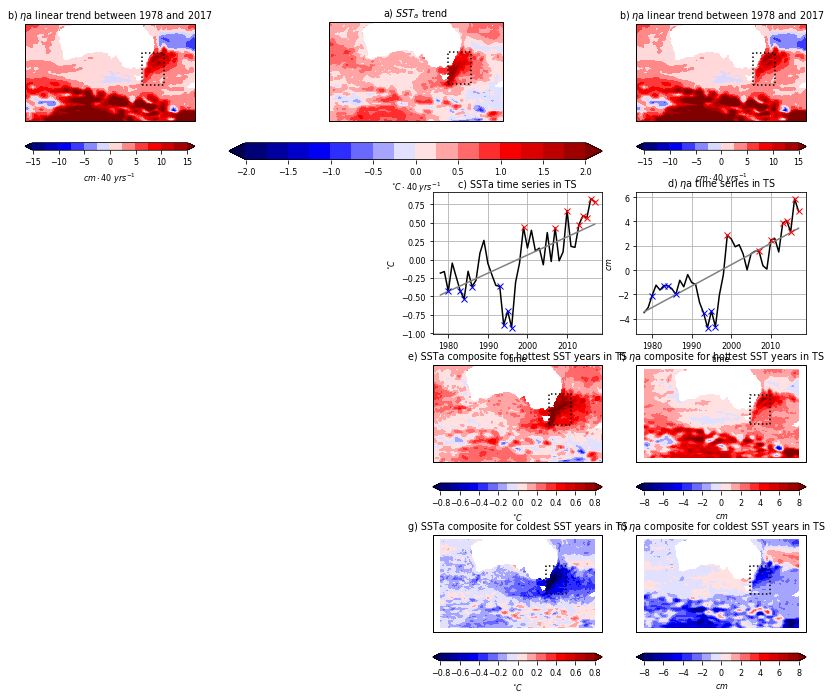

In [51]:
years_comp = 8

temp_slopes_40 = temp_slopes * 40
eta_t_slopes_40 = eta_t_slopes * 40

# lon_TS = [147, 152]
# lat_TS = [-46, -38]
# lon_CS = [152, 159]
# lat_CS = [-38, -31]

lon_TS = [148, 157]
lat_TS = [-45, -32]
lon_CS = [148, 157]
lat_CS = [-45, -32]

temp_anom_SA = temp_anom.\
sel(xt_ocean=slice(lon_TS[0],lon_TS[1])).\
sel(yt_ocean=slice(lat_TS[0],lat_TS[1])).\
mean(dim='xt_ocean').\
mean(dim='yt_ocean')
# print(temp_anom_SA)
temp_anom_SA_slope, temp_anom_SA_intrsct, _, _, _ = \
        stats.linregress(n_years, temp_anom_SA)


eta_t_anom_SA = eta_t_anom.\
sel(xt_ocean=slice(lon_CS[0],lon_CS[1])).\
sel(yt_ocean=slice(lat_CS[0],lat_CS[1])).\
mean(dim='xt_ocean').\
mean(dim='yt_ocean')
# print(eta_t_anom_SA)
eta_t_anom_SA_slope, eta_t_anom_SA_intrsct, _, _, _ = \
        stats.linregress(n_years, eta_t_anom_SA)


# temp_anom_SA_std_warm = np.std(temp_anom_SA)*1.4
# temp_anom_SA_std_cold = np.std(temp_anom_SA)*0.5

temp_anom_SA_sort = np.sort(temp_anom_SA)
# print(temp_anom_SA_sort)

temp_warm = xr.DataArray(np.zeros([years_comp, yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'year', 'latitude', 'longitude'), coords=[np.arange(years_comp), yt_ocean, xt_ocean], name='temp')
eta_t_warm = xr.DataArray(np.zeros([years_comp, yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'year', 'latitude', 'longitude'), coords=[np.arange(years_comp), yt_ocean, xt_ocean], name='eta_t')
years_warm = []
temp_anom_SA_warm_unsort = []
eta_t_anom_SA_warm_unsort = []
t=-1
# print(temp_anom_SA_sort[-years_comp:])
for y in n_years:
    if np.array(temp_anom_SA.sel(time=y)) in temp_anom_SA_sort[-years_comp:]:
        print(y)
        print(t)
        t+=1
        years_warm.append(y)
        temp_anom_SA_warm_unsort.append(np.array(temp_anom_SA.sel(time=y)))
        eta_t_anom_SA_warm_unsort.append(np.array(eta_t_anom_SA.sel(time=y)))
        temp_warm[t,:,:] = temp_anom.sel(time=y)
        eta_t_warm[t,:,:] = eta_t_anom.sel(time=y)
# print(years_warm)
# print(temp_warm)
temp_warm_composite = temp_warm.mean(dim='year')
eta_t_warm_composite = eta_t_warm.mean(dim='year')

temp_cold = xr.DataArray(np.zeros([years_comp, yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'year', 'latitude', 'longitude'), coords=[np.arange(years_comp), yt_ocean, xt_ocean], name='temp')
eta_t_cold = xr.DataArray(np.zeros([years_comp, yt_ocean.shape[0], xt_ocean.shape[0]]), dims=(
    'year', 'latitude', 'longitude'), coords=[np.arange(years_comp), yt_ocean, xt_ocean], name='eta_t')
years_cold = []
temp_anom_SA_cold_unsort = []
eta_t_anom_SA_cold_unsort = []
t=-1
for y in n_years:
    if np.array(temp_anom_SA.sel(time=y)) in temp_anom_SA_sort[:years_comp]:
        t+=1
        years_cold.append(y)
        temp_anom_SA_cold_unsort.append(np.array(temp_anom_SA.sel(time=y)))
        eta_t_anom_SA_cold_unsort.append(np.array(eta_t_anom_SA.sel(time=y)))
        temp_cold[t,:,:] = temp_anom.sel(time=y)
        eta_t_cold[t,:,:] = eta_t_anom.sel(time=y)
# print(years_cold)
# print(temp_cold)
temp_cold_composite = temp_cold.mean(dim='year')
eta_t_cold_composite = eta_t_cold.mean(dim='year')


years_extremes = np.concatenate([years_cold, years_warm])
temp_extremes = np.concatenate([temp_anom_SA_cold_unsort, temp_anom_SA_warm_unsort])
temp_extremes_slope, temp_extremes_intrsct, _, _, _ = \
        stats.linregress(years_extremes, temp_extremes)
eta_t_extremes = np.concatenate([eta_t_anom_SA_cold_unsort, eta_t_anom_SA_warm_unsort])
eta_t_extremes_slope, eta_t_extremes_intrsct, _, _, _ = \
        stats.linregress(years_extremes, eta_t_extremes)


# print(temp_extremes)
# print(years_extremes)

row = 4
col = 4
fig = plt.figure()
fig.set_size_inches(14,12)
matplotlib.rcParams.update({'font.size': 8}) 


plt.subplot2grid((row, col), (0, 1), rowspan=1, colspan=2, projection=ccrs.PlateCarree())
levels = np.arange(-2,2.25,0.25)
temp_slopes_40.plot.contourf(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$^{\circ}C \cdot 40\ yrs^{-1}$'})
plt.grid()
plt.plot(
    [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title('a) $SST_{a}$ trend')
plt.xlabel('')
plt.ylabel('')


plt.subplot2grid((row, col), (0, 3), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
levels = np.arange(-15,17.5,2.5)
eta_t_slopes_40.plot.contourf(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$cm \cdot 40\ yrs^{-1}$'})
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.plot(
    [lon_CS[0], lon_CS[1], lon_CS[1], lon_CS[0], lon_CS[0]],
    [lat_CS[0], lat_CS[0], lat_CS[1], lat_CS[1], lat_CS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title(r'b) $\eta$a linear trend between 1978 and 2017')

plt.subplot2grid((row, col), (1, 2), rowspan=1, colspan=1)
temp_anom_SA.plot(color='k')
plt.grid()
plt.plot(
    [n_years[0], n_years[-1]], 
    [n_years[0]*temp_anom_SA_slope+temp_anom_SA_intrsct, n_years[-1]*temp_anom_SA_slope+temp_anom_SA_intrsct], 
    color='gray')
plt.plot(
    years_warm, temp_anom_SA_warm_unsort, 
    color='red', linestyle='', marker='x')
plt.plot(
    years_cold, temp_anom_SA_cold_unsort, 
    color='blue', linestyle='', marker='x')
plt.title('c) SSTa time series in TS')
plt.ylabel('$^{\circ}C$')

plt.subplot2grid((row, col), (1, 3), rowspan=1, colspan=1)
eta_t_anom_SA.plot(color='k')
plt.grid()
plt.plot(
    [n_years[0], n_years[-1]], 
    [n_years[0]*eta_t_anom_SA_slope+eta_t_anom_SA_intrsct, n_years[-1]*eta_t_anom_SA_slope+eta_t_anom_SA_intrsct], 
    color='gray')
plt.plot(
    years_warm, eta_t_anom_SA_warm_unsort, 
    color='red', linestyle='', marker='x')
plt.plot(
    years_cold, eta_t_anom_SA_cold_unsort, 
    color='blue', linestyle='', marker='x')
plt.title(r'd) $\eta$a time series in TS')
plt.ylabel('$cm$')

plt.subplot2grid((row, col), (2, 2), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
levels = np.arange(-0.8,0.9,0.1)
temp_warm_composite.plot.contourf(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$^{\circ}C$'})
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.plot(
    [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title('e) SSTa composite for hottest SST years in TS')

plt.subplot2grid((row, col), (2, 3), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
levels = np.arange(-8,9,1)
eta_t_warm_composite.plot(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$cm$'})
# levels = np.arange(-10,10,0.5)
# CS = eta_t_bl_mean.plot.contour(colors='k', levels=levels, linewidths=1)
# plt.clabel(CS, inline=3, fontsize=10, fmt='%1.2f')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.plot(
    [lon_CS[0], lon_CS[1], lon_CS[1], lon_CS[0], lon_CS[0]],
    [lat_CS[0], lat_CS[0], lat_CS[1], lat_CS[1], lat_CS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title(r'f) $\eta$a composite for hottest SST years in TS')

plt.subplot2grid((row, col), (3, 2), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
levels = np.arange(-0.8,0.9,0.1)
temp_cold_composite.plot(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$^{\circ}C$'})
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.plot(
    [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title('g) SSTa composite for coldest SST years in TS')

plt.subplot2grid((row, col), (3, 3), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
levels = np.arange(-8,9,1)
eta_t_cold_composite.plot(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$cm$'})
# levels = np.arange(-10,10,0.5)
# CS = eta_t_bl_mean.plot.contour(colors='k', levels=levels, linewidths=1)
# plt.clabel(CS, inline=3, fontsize=10, fmt='%1.2f')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.plot(
    [lon_CS[0], lon_CS[1], lon_CS[1], lon_CS[0], lon_CS[0]],
    [lat_CS[0], lat_CS[0], lat_CS[1], lat_CS[1], lat_CS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title(r'h) $\eta$a composite for coldest SST years in TS')


plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
levels = np.arange(-15,17.5,2.5)
eta_t_slopes_40.plot.contourf(cmap='seismic', levels=levels, extend='both', 
                             cbar_kwargs={'orientation': 'horizontal', 
                                          'label': '$cm \cdot 40\ yrs^{-1}$'})
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.plot(
    [lon_CS[0], lon_CS[1], lon_CS[1], lon_CS[0], lon_CS[0]],
    [lat_CS[0], lat_CS[0], lat_CS[1], lat_CS[1], lat_CS[0]],
    color='k', linestyle=':')
plt.gca().set_facecolor('gray')
plt.title(r'b) $\eta$a linear trend between 1978 and 2017')


# fig.tight_layout(rect=[0, 0, 1, 0.90])

# output_ls = os.listdir(figures_path)
# if not script_name:
#     script_name = 'test'
# elif script_name not in output_ls:
#     os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig1_.png', bbox_inches='tight', dpi=200)